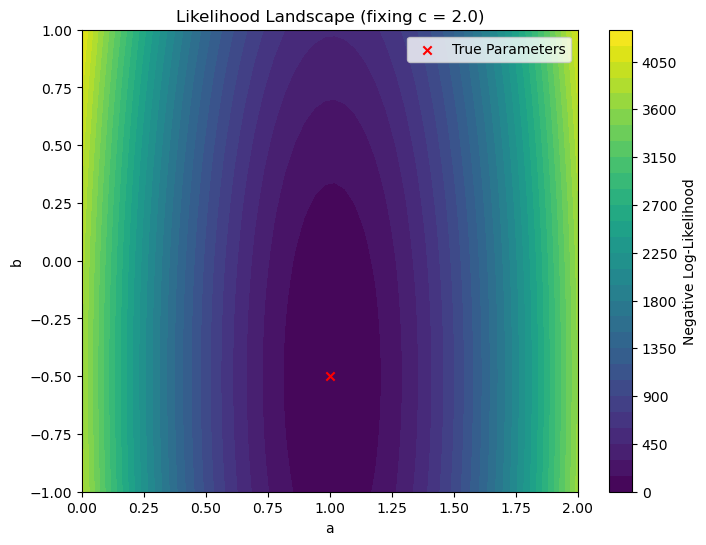

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data
np.random.seed(42)
x_data = np.linspace(-5, 5, 10)  # Sparse data points
true_params = [1.0, -0.5, 2.0]  # True values for (a, b, c)
sigma_y = 0.5  # Noise level
y_data = true_params[0] * x_data**2 + true_params[1] * x_data + true_params[2] + np.random.normal(0, sigma_y, len(x_data))

# Define model
def model(x, a, b, c):
    return a * x**2 + b * x + c

# Compute negative log-likelihood
def neg_log_likelihood(a, b, c):
    y_model = model(x_data, a, b, c)
    return -np.sum(norm.logpdf(y_data, loc=y_model, scale=sigma_y))  # Gaussian likelihood

# Create a grid for two parameters
a_vals = np.linspace(0, 2, 50)
b_vals = np.linspace(-1, 1, 50)
A, B = np.meshgrid(a_vals, b_vals)
C_fixed = true_params[2]  # Fix c at its true value
Z = np.array([[neg_log_likelihood(a, b, C_fixed) for a, b in zip(A_row, B_row)] for A_row, B_row in zip(A, B)])

# Plot the likelihood landscape
plt.figure(figsize=(8, 6))
plt.contourf(A, B, Z, levels=30, cmap="viridis")
plt.colorbar(label="Negative Log-Likelihood")
plt.scatter(true_params[0], true_params[1], color='red', marker='x', label="True Parameters")
plt.xlabel("a")
plt.ylabel("b")
plt.title(f"Likelihood Landscape (fixing c = {C_fixed})")
plt.legend()
plt.show()
